Questions:

???????????????????????????????????

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_som.som import SOM
import numpy as np

plt.rcParams['figure.figsize'] = (10, 6)

dfd = pd.read_csv('data/full_data.csv', engine= 'python')
# df.head()

In [8]:
dfd["Status.simple"].unique()

array(['Dysplastic', 'Inflamed', 'Uninflamed'], dtype=object)

In [10]:
from pandas.api.types import is_numeric_dtype
col = ["Status.simple","ImageNumber","ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean","cx", "cy","nx", "ny"]

dfd = dfd[col]
for c in dfd.columns[3:]:
    if not is_numeric_dtype(dfd[c]):
        dfd[c] = dfd[c].apply(lambda x: float(x.split()[0].replace(',','.')))

df = dfd[dfd["Status.simple"] == "Uninflamed"].drop("Status.simple", axis=1)

C:\Users\Arthur\AppData\Local\Temp\ipykernel_24768\1276008991.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd[c] = dfd[c].apply(lambda x: float(x.split()[0].replace(',','.')))


In [11]:
dfn = df.copy()
for c in dfn.columns[1:]:
    if is_numeric_dtype(dfn[c]):
        dfn[c] = (dfn[c]-dfn[c].mean())/dfn[c].std()
dfn

,ImageNumber,ROInr,Cell_Area,Nucl_Area,X80ArAr_Mean,sSMA113_Mean,aSMA_Mean,X124Xe_Mean,X127I_Mean,X129Xe_Mean,...,TCRgd_Mean,pAKT_Mean,H3_Mean,H3_Nucl_Mean,Ir193_Mean,Ir193_Nucl_Mean,cx,cy,nx,ny
11766,20210728_MBAA47_S10_R-1_D-S10_T44_R2,-1.310778,0.560935,-0.269572,-0.374872,-0.567293,-1.063885,-0.793882,0.497267,-0.496941,...,-0.511395,0.539835,-0.752439,-0.393281,-0.469876,0.252160,0.350414,0.386362,0.355441,0.378443
11767,20210728_MBAA47_S10_R-1_D-S10_T44_R2,-1.309457,-0.626803,-0.872591,-0.375037,0.391120,0.531077,-0.604995,0.445614,-0.491710,...,-0.017821,-0.425332,-0.080947,-0.220627,0.342760,-0.400471,0.807452,0.379484,0.811746,0.374475
11768,20210728_MBAA47_S10_R-1_D-S10_T44_R2,-1.308796,-1.294906,-1.123849,-0.377793,-0.618361,-1.076264,-1.349758,0.482880,-0.439747,...,-0.333692,-0.723673,-0.828782,-1.068260,0.032074,-0.441705,0.279839,0.362327,0.277847,0.363881
11769,20210728_MBAA47_S10_R-1_D-S10_T44_R2,-1.307475,-0.070051,0.082189,-0.373906,-0.583304,-0.993564,-0.238087,0.468457,-0.554660,...,-0.206291,-0.060213,-0.713551,-0.537091,-0.105661,0.334442,-0.910521,0.367007,-0.909950,0.364295
11770,20210728_MBAA47_S10_R-1_D-S10_T44_R2,-1.306814,0.171208,0.082189,-0.377436,-0.587624,-0.924015,-0.069394,0.472844,-0.508921,...,-0.812953,-0.634548,-0.498632,-0.528830,-0.673618,-0.600140,0.407380,0.361749,0.406096,0.357264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329601,20210807_MBAA047_S4_R-5_D-S4_T24_R3,-0.344800,-0.886621,-1.073598,-0.639659,-0.618361,-0.929732,-1.279407,-0.962052,-0.578041,...,-0.889581,-1.348381,-0.987293,-0.822554,-0.948594,-0.966489,-0.852589,-1.439266,-0.856338,-1.440065
329602,20210807_MBAA047_S4_R-5_D-S4_T24_R3,-0.344140,-0.552570,1.388731,-0.635903,-0.416119,-0.422912,-2.080161,-0.836866,-0.602291,...,-0.009869,-1.821040,-1.853419,-2.239839,-1.278462,-1.757771,-0.806304,-1.435870,-0.806511,-1.435606
329603,20210807_MBAA047_S4_R-5_D-S4_T24_R3,-0.343479,0.523818,0.182692,-0.639607,-0.294417,-0.275071,-1.537012,-0.940522,-0.576563,...,1.389221,-0.678995,-1.036712,-1.362385,-0.805571,-1.502896,-0.739652,-1.465844,-0.753670,-1.448159
329604,20210807_MBAA047_S4_R-5_D-S4_T24_R3,-0.342818,-0.589686,-0.822340,-0.639551,-0.568946,-0.814097,-0.711238,-0.899016,-0.598769,...,-0.675765,-1.360861,-0.668129,-0.617474,-0.939512,-1.171255,-0.873184,-1.456204,-0.869569,-1.450644


In [12]:
# grouped = dfn.drop(["cx", "cy"], axis = 1).groupby('ImageNumber')
grouped = dfn.groupby('ImageNumber')
# grouped.count()

In [14]:
som = SOM(m=4, n=4, dim=56)
maxs = 0
keep = None
t = 50
for name, group in grouped:
    features = group._get_numeric_data().values
    if len(features) > maxs:
        maxs = len(features)
        if keep is not None:
            epoch = len(keep)*t
            som.fit(keep, epochs=epoch)
        keep = features
    else:
        epoch = len(features)*t
        som.fit(features, epochs=epoch)

In [ ]:
df1n = keep.copy()
df1n = pd.DataFrame(df1n, columns=col[2:])
df2 = dfd[dfd['ImageNumber'] == '20210808_MBAA047_S8_R-2_D-S8_T42_R4']
# normalize df1
df2n = df2.copy()
for c in df2n.columns:
    if is_numeric_dtype(df2n[c]):
        df2n[c] = (df2n[c]-df2n[c].mean())/df2n[c].std()

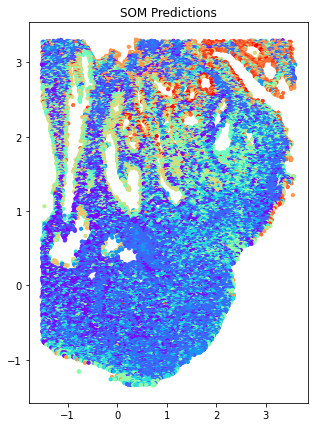

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df1n['cx']
y = df1n['cy']

ax.scatter(x, y, c=som.predict(df1n._get_numeric_data().values), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

AssertionError: This SOM has dimesnion 58. Received input with dimension 56

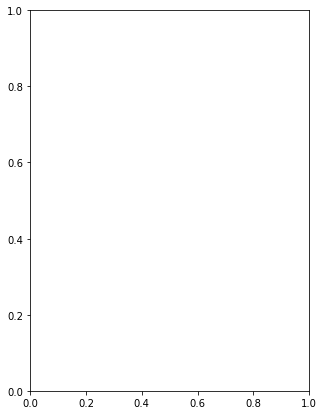

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df2n['cx']
y = df2n['cy']
features = df2n._get_numeric_data().values
features = np.delete(features, [0,1], axis=1)
ax.scatter(x, y, c=som.predict(features), cmap='rainbow', s=10)
ax.title.set_text('SOM Predictions')


plt.show()

array([[<AxesSubplot:title={'center':'aSMA_Mean'}>]], dtype=object)

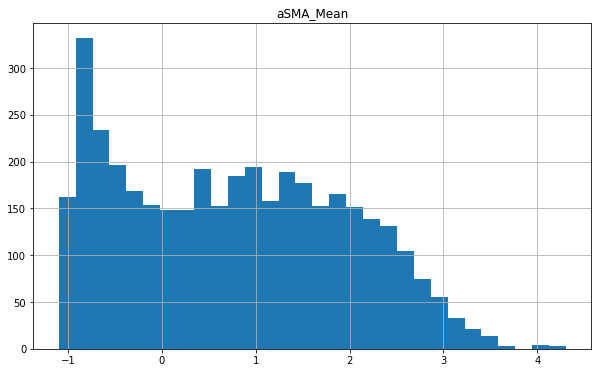

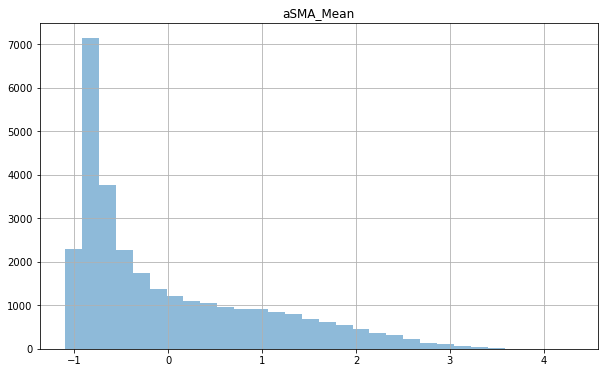

In [ ]:
df2n['predictions'] = som.predict(np.delete(df2n._get_numeric_data().values, [0,1], axis=1))

mask = df2n['predictions'] == 0
cluster1 = df2n[mask]
cluster1[["aSMA_Mean"]].hist(bins = 30)
df2n[["aSMA_Mean"]].hist(bins = 30, alpha=0.5)